In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
def read_temperature_data_file(path):
    temperature_data = pd.read_csv(path, sep=";", header=15 , skip_blank_lines=False, usecols=list(range(6))).dropna(how="all")
    temperature_data.columns = ["Datum", "Tid", "Min_temp", "Kvalitet_min", "Max_temp", "Kvalitet_max"]
    return temperature_data


In [39]:
temperature_data_last_day = read_temperature_data_file("data/smhi-opendata_1_day.csv")
temperature_data_last_4_month = read_temperature_data_file("data/smhi-opendata_4_month.csv")
temperature_data_historic = read_temperature_data_file("data/smhi-opendata_historic.csv")

Vi har fyra olika temperaturserier  i datasetten:
- min temp under natten (18 till 06)
- max temp under natten (18 till 06)
- min temp under dagen (06 till 18)
- max temp under dagen (06 till 18)


Mätning två ggr dagligen börjar först 1965-01-01  - så vad betyder datan innan dess? Är det min max för hela dygnet? I så fall är nog min för natt och max för dag.

Större luckor i datan finns:
- 1969-05-01 till 1969-06-30
- 1972-04-01 till 1972-06-30
- 1976-10-01 till 1983-03-31 
- 1998-06-01 till 1999-02-28


Vissa år ha sommartid och andra inte ¯\\_(ツ)_/¯ Tiden anges i UTC så sommartiden spelar ingen roll.



In [40]:
temperature_data_last_day

,Datum,Tid,Min_temp,Kvalitet_min,Max_temp,Kvalitet_max
0,2022-05-16,18:00:00,10.0,G,18.8,G
1,2022-05-17,06:00:00,4.1,G,16.0,G


In [41]:
temperature_data_last_4_month

,Datum,Tid,Min_temp,Kvalitet_min,Max_temp,Kvalitet_max
0,2022-01-07,06:00:00,-5.0,G,2.1,G
1,2022-01-07,18:00:00,0.9,G,3.4,G
2,2022-01-08,06:00:00,2.4,G,4.0,G
3,2022-01-08,18:00:00,0.9,G,2.8,G
4,2022-01-09,06:00:00,0.6,G,1.3,G
...,...,...,...,...,...,...
256,2022-05-15,06:00:00,9.6,G,12.9,G
257,2022-05-15,18:00:00,12.3,G,17.1,G
258,2022-05-16,06:00:00,7.5,G,13.7,G
259,2022-05-16,18:00:00,10.0,G,18.8,G


In [77]:
temperature_data_historic.query("Datum > '1986-08-20' and Datum < '1986-12-31'").head(50)


,Datum,Tid,Min_temp,Kvalitet_min,Max_temp,Kvalitet_max
12148,1986-08-21,06:00:00,10.7,G,15.5,G
12149,1986-08-21,18:00:00,13.1,G,17.8,G
12150,1986-08-22,06:00:00,11.9,G,13.7,G
12151,1986-08-22,18:00:00,10.4,G,15.4,G
12152,1986-08-23,06:00:00,9.2,G,13.4,G
12153,1986-08-23,18:00:00,9.6,G,15.1,G
12154,1986-08-24,06:00:00,9.4,G,13.1,G
12155,1986-08-24,18:00:00,10.3,G,16.3,G
12156,1986-08-25,06:00:00,5.2,G,12.8,G
12157,1986-08-25,18:00:00,8.2,G,16.9,G


<AxesSubplot:xlabel='Datum'>

<Figure size 720x1440 with 0 Axes>

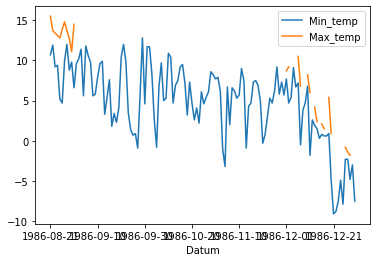

In [70]:
plt.figure(figsize=(10,20) )
temperature_data_historic.query("Tid == '06:00:00' and Datum > '1986-08-20' and Datum < '1986-12-31'").plot("Datum", ["Min_temp", "Max_temp"])
